# **SpaceX  Falcon 9 First Stage Landing Prediction**

## Assignment: Exploring and Preparing Data

In [1]:
# Carregando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Carregando base de dados

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

In [4]:
# Visualizando base de dados

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome

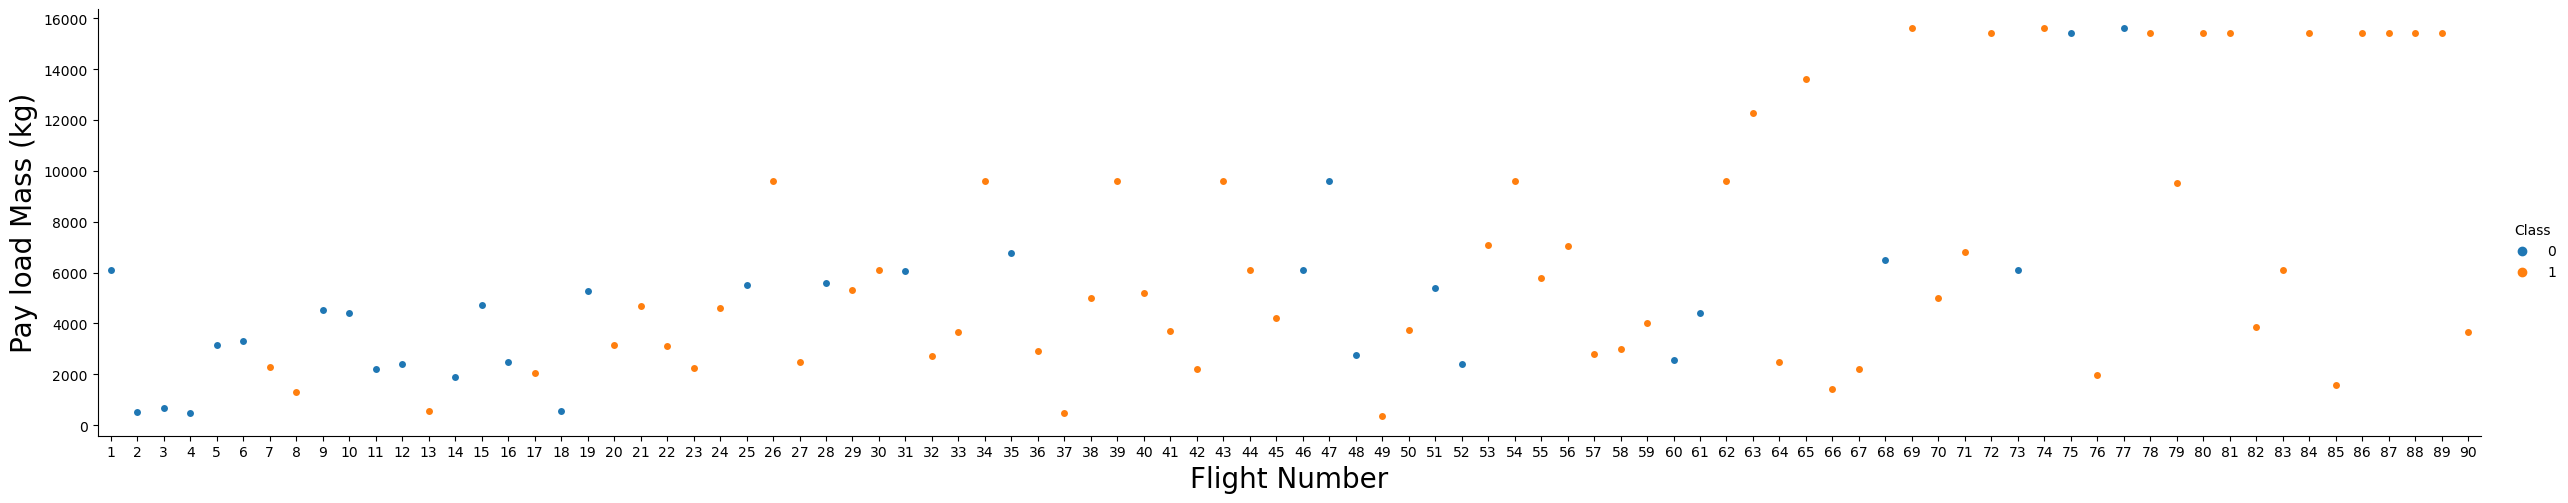

In [5]:
# Gráfico 1

sns.catplot(y = "PayloadMass", 
            x = "FlightNumber", 
            hue = "Class", 
            data = df, 
            aspect = 5)

plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Pay load Mass (kg)",fontsize = 20)

plt.show();

### TASK 1: Visualize the relationship between Flight Number and Launch Site

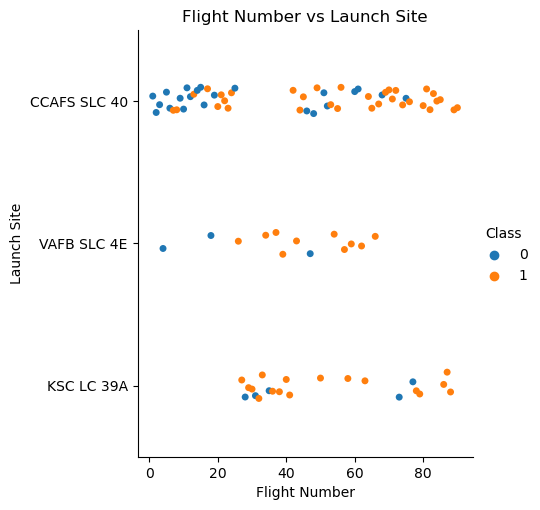

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

# Criar o gráfico de dispersão
sns.catplot(x = 'FlightNumber',
            y = 'LaunchSite',
            hue = 'Class',
            data = df)

# Adicionar título e rótulos aos eixos
plt.title('Flight Number vs Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')

# Mostrar o gráfico
plt.show();

### TASK 2: Visualize the relationship between Payload and Launch Site

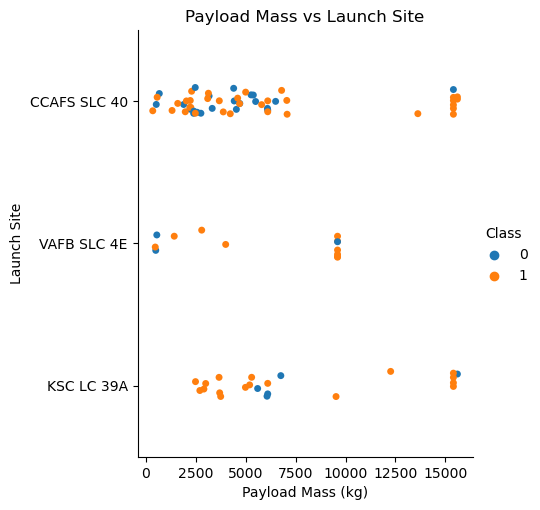

In [7]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

# Criar o gráfico de dispersão
sns.catplot(x = 'PayloadMass',
            y = 'LaunchSite',
            hue = 'Class',
            data = df)

# Adicionar título e rótulos aos eixos
plt.title('Payload Mass vs Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')

# Mostrar o gráfico
plt.show();

### TASK  3: Visualize the relationship between success rate of each orbit type

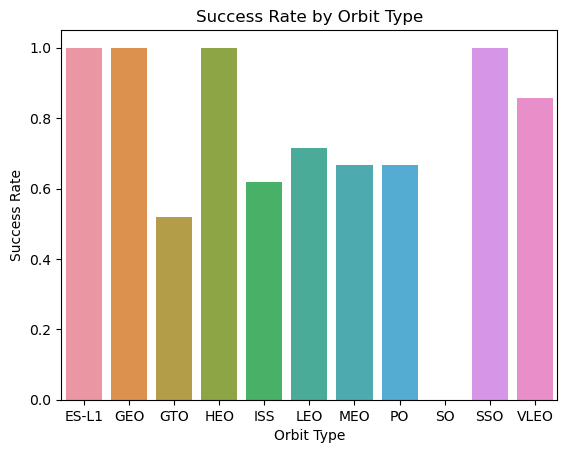

In [8]:
# HINT use groupby method on Orbit column and get the mean of Class column

## Calcular a taxa de sucesso para cada tipo de órbita
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

## Renomear a coluna para clareza
success_rate.columns = ['Orbit', 'SuccessRate']

## Criar o gráfico de barras
sns.barplot(x = 'Orbit',
            y = 'SuccessRate',
            data = success_rate)

## Adicionar título e rótulos aos eixos
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')

## Mostrar o gráfico
plt.show();

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

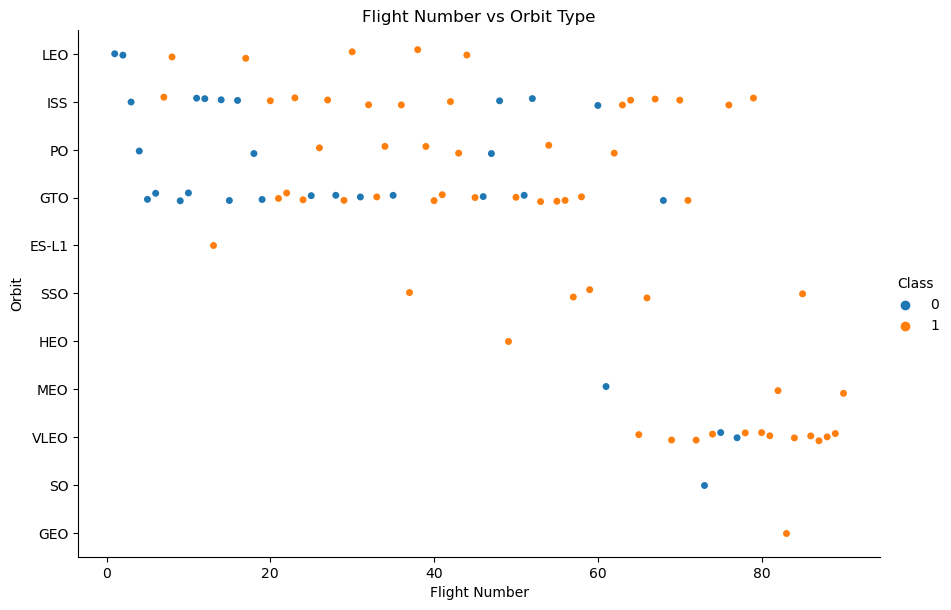

In [9]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

## Criar o gráfico de dispersão
sns.catplot(x = 'FlightNumber',
            y = 'Orbit',
            hue = 'Class',
            data = df,
            aspect = 1.5,
            height = 6)

## Adicionar título e rótulos aos eixos
plt.title('Flight Number vs Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')

## Mostrar o gráfico
plt.show();

### TASK  5: Visualize the relationship between Payload and Orbit type

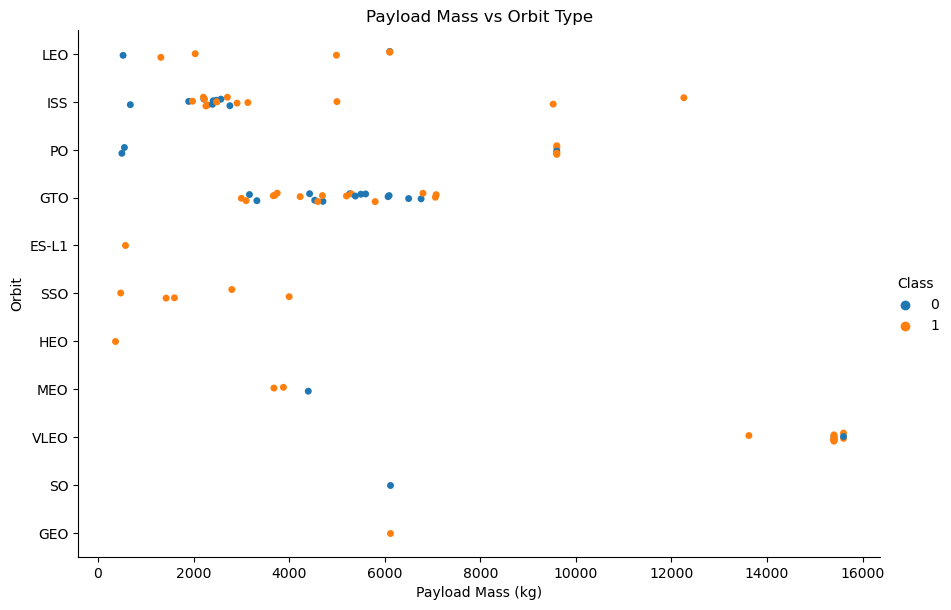

In [10]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

## Criar o gráfico de dispersão
sns.catplot(x = 'PayloadMass',
            y = 'Orbit',
            hue = 'Class',
            data = df,
            aspect = 1.5,
            height = 6)

## Adicionar título e rótulos aos eixos
plt.title('Payload Mass vs Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')

## Mostrar o gráfico
plt.show()

### TASK  6: Visualize the launch success yearly trend

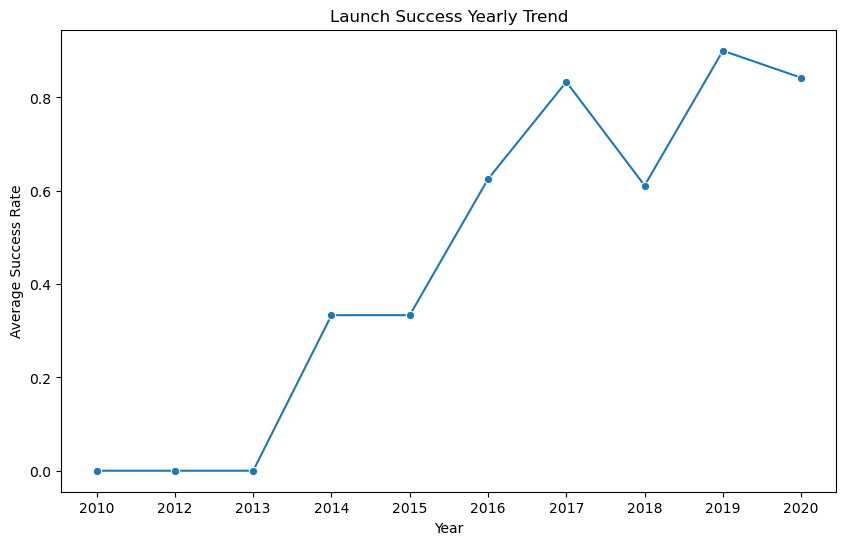

In [11]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

## Função para extrair o ano da coluna de datas
def Extract_year(date):
    return date.split("-")[0]

## Aplicar a função de extração de ano à coluna 'Date'
df['Year'] = df['Date'].apply(Extract_year)

## Calcular a taxa média de sucesso para cada ano
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

## Renomear as colunas para clareza
yearly_success_rate.columns = ['Year', 'Success_Rate']

## Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'Year',
             y = 'Success_Rate',
             data = yearly_success_rate,
             marker = 'o')

## Adicionar título e rótulos aos eixos
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')

## Mostrar o gráfico
plt.show()

## Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns

In [13]:
# HINT: Use get_dummies() function on the categorical columns

## Aplicar get_dummies para colunas categóricas
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

## Exibir as primeiras linhas do dataframe resultante
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`

In [14]:
# HINT: use astype function

## Cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')

## Display the dtypes to confirm the changes
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object
